# **Sentiment Analysis based product recommendation system**
### Capstone Project By : Divya peachi Moorthy

## To include below tasks:

- Data sourcing and sentiment analysis
    - Data Loading and understanding
    - Data preprocessing
    - Exploratory data analysis
    - Text preprocessing
    - Feature Extraction
    - Balancing the data
    - Data splitting
    - Model Building
    
- Building a recommendation system
    - User based recommendation system
    - Item based recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

## Problem Statement 

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import itertools
import time
import nltk
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn import preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances

## Data Loading and Data understanding

In [2]:
df = pd.read_csv("sample30.csv")

In [3]:
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


In [4]:
df.shape

(30000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [7]:
df['reviews_date'].nunique()

6857

In [8]:
df['reviews_doRecommend'].nunique()

2

In [9]:
df['reviews_doRecommend'].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

In [10]:
df['user_sentiment'].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [11]:
df['reviews_username'].value_counts()

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
                     ..
sassylady             1
niraj                 1
nlchap                1
magellan              1
runbum47              1
Name: reviews_username, Length: 24914, dtype: int64

## Data preprocessing 

### Dropping unwanted columns

In [12]:
df.drop(columns=['brand', 'categories', 'manufacturer'], inplace=True)

In [13]:
df.shape

(30000, 12)

### Combining the columns

In [14]:
df['reviews'] = (df['reviews_title'].apply(lambda x: str(x).strip())
                + " "
                + df['reviews_text'].apply(lambda x: str(x).strip()))

In [15]:
df.head(3)

,id,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.


**Drop the combined columns**

In [16]:
df.drop(columns=['reviews_title', 'reviews_text'], inplace=True)

In [17]:
df.shape

(30000, 11)

### Handling Null values 

**Checking the percentage of null values in each column**

In [18]:
df[df.columns[df.isnull().any()]].isnull().sum()/df.shape[0] * 100

reviews_date             0.153333
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_userCity        93.570000
reviews_userProvince    99.433333
reviews_username         0.210000
user_sentiment           0.003333
dtype: float64

**Dropping the column with higher missing values**

In [19]:
df.drop(columns=['reviews_userCity', 'reviews_userProvince', 'reviews_didPurchase'], inplace=True)

In [20]:
df.shape

(30000, 8)

**Checking the percentage of null values again in the remaining dataset**

In [21]:
df[df.columns[df.isnull().any()]].isnull().sum()/df.shape[0] * 100

reviews_date           0.153333
reviews_doRecommend    8.566667
reviews_username       0.210000
user_sentiment         0.003333
dtype: float64

**Dropping the columns with higher missing values**

In [22]:
df1 = df[pd.isnull(df['reviews_doRecommend'])]

In [23]:
df1.shape

(2570, 8)

In [24]:
df1[df1['reviews_rating'] <3].head(3)

,id,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,reviews
16,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,2016-01-29T00:00:00.000Z,NaN,1,beccagrl532,Negative,Was so disappointed!! I bought this product to...
41,AV1h6Gu0glJLPUi8IjA_,"Johnson's Baby Bubble Bath and Wash, 15oz",2017-04-05T00:00:00.000Z,NaN,2,nyisha m,Negative,Not the quantity specifed I did receive 1 bott...
716,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,2017-06-20T13:23:45.000Z,NaN,1,disappointedmom,Positive,Would Love To Use It But I Can't... Bottle Kee...


In [25]:
df.drop(columns=['reviews_doRecommend'], inplace=True)

**checking the null values present in the data after dropping 'reviews_doRecommend' column**

In [26]:
df[df.columns[df.isnull().any()]].isnull().sum()/df.shape[0] * 100

reviews_date        0.153333
reviews_username    0.210000
user_sentiment      0.003333
dtype: float64

In [27]:
df[df.columns[df.isnull().any()]].isnull().sum()

reviews_date        46
reviews_username    63
user_sentiment       1
dtype: int64

In [28]:
sum(df[df.columns[df.isnull().any()]].isnull().sum())

110

In [29]:
df.head(5)

,id,name,reviews_date,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,joshua,Positive,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,Positive,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,Positive,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,rebecca,Negative,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,walker557,Negative,Irritation My husband bought this gel for us. ...


**Analyzing the data to fill null values**

In [30]:
df['reviews_date']

0        2012-11-30T06:21:45.000Z
1        2017-07-09T00:00:00.000Z
2        2017-07-09T00:00:00.000Z
3        2016-01-06T00:00:00.000Z
4        2016-12-21T00:00:00.000Z
                   ...           
29995    2017-01-23T00:00:00.000Z
29996    2017-01-27T00:00:00.000Z
29997    2017-01-21T00:00:00.000Z
29998    2017-01-11T00:00:00.000Z
29999    2017-01-19T00:00:00.000Z
Name: reviews_date, Length: 30000, dtype: object

In [31]:
len(df[df['reviews_date'].isnull()])

46

In [32]:
df[df['reviews_date'].notnull()]['reviews_date']

0        2012-11-30T06:21:45.000Z
1        2017-07-09T00:00:00.000Z
2        2017-07-09T00:00:00.000Z
3        2016-01-06T00:00:00.000Z
4        2016-12-21T00:00:00.000Z
                   ...           
29995    2017-01-23T00:00:00.000Z
29996    2017-01-27T00:00:00.000Z
29997    2017-01-21T00:00:00.000Z
29998    2017-01-11T00:00:00.000Z
29999    2017-01-19T00:00:00.000Z
Name: reviews_date, Length: 29954, dtype: object

In [33]:
df1 = df[df['reviews_date'].notnull()]['reviews_date'].apply(lambda x: x[:4])

In [34]:
df1.value_counts()

2014    8377
2015    6458
2016    4956
2012    4310
2017    3154
2013    1334
2009     487
2011     454
2010     381
2008      22
2007      10
 hoo       8
2018       3
Name: reviews_date, dtype: int64

In [35]:
len(df[df['reviews_date'].isnull()])

46

**Filling null values present in the column 'review_data' with 2014 since that is most common**

In [36]:
df['reviews_date'].fillna("2014", inplace=True)

In [37]:
df['reviews_date'] = df[df['reviews_date'].notnull()]['reviews_date'].apply(
    lambda x: int(x[:4]) if x[:4]!=' hoo' else 2014)

In [38]:
datetime.now().year

2022

**calculating the number of years present in between the values of 'reviews_date' column and 2022** 

In [39]:
df['reviews_age'] = datetime.now().year - df['reviews_date']

In [40]:
df.head(3)

,id,name,reviews_date,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,5,joshua,Positive,Just Awesome i love this album. it's very good...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,2017,5,dorothy w,Positive,Good Good flavor. This review was collected as...,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,2017,5,dorothy w,Positive,Good Good flavor.,5


In [41]:
df.drop(columns=['reviews_date'], inplace=True)

In [42]:
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor. This review was collected as...,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor.,5


In [43]:
df['reviews_age'].value_counts()

8     8431
7     6458
6     4956
10    4310
5     3154
9     1334
13     487
11     454
12     381
14      22
15      10
4        3
Name: reviews_age, dtype: int64

**counting null values present in the data**

In [44]:
sum(df[df.columns[df.isnull().any()]].isnull().sum())

64

In [45]:
df[df.columns[df.isnull().any()]].isnull().sum()

reviews_username    63
user_sentiment       1
dtype: int64

**Dropping null values present in column 'reviews_username**

In [46]:
df.dropna(subset=['reviews_username'], inplace=True)

In [47]:
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor. This review was collected as...,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor.,5


In [48]:
df[df.columns[df.isnull().any()]].isnull().sum()

user_sentiment    1
dtype: int64

**Handling the null value in the column 'user_sentiment'**

In [49]:
df[df['user_sentiment'].isnull()]

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
28354,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,7.87E+11,NaN,a super hit with my children. they loved it!!?...,8


In [50]:
df.loc[28354, 'user_sentiment'] = "Positive"

In [51]:
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor. This review was collected as...,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor.,5


In [52]:
df.isnull().sum().sum()

0

In [53]:
df.shape

(29937, 7)

### Handling Duplicate values 

In [54]:
df.duplicated().sum()

279

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor. This review was collected as...,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor.,5


In [57]:
df.shape

(29658, 7)

**Observation**
- Shape of the data before data preprocessing : **(30000, 15)**
- Dropping unwanted columns
    - 'brand', 'categories', 'manufacturer'are columns, that are dropped as unwanted.
    - These columns are unnecessary because the contents present in these column also exist in the column 'names'
    - In order to avoid overidding these columns are dropped from the data
- Combining the columns
    - column 'reviews_title' and 'reviews_text' were conacatenated and added to the new column named as 'reviews'
- Handling Null values
    - On checking the presence of null values in the data it was scknowledge that the columns 'reviews_userCity', 'reviews_userProvince', 'reviews_didPurchase' contains higher number of null values and accordingly these columns were dropped
    - column 'reviews_doRecommend' is dropped because it consist almost 2570 null values
    - Even after dropping all the unwanted columns and columns with higher null values, there are still null values present in the data
    - 110 null values still exist in the data
    - Null values in the column 'review_date' has been filled with '2014', as it was acknowledged from data analysis that the value '2014' is the most common value in the column 'review_date'
    - Null values present in the column 'review_username' has been dropped
    - Null value present in the column 'user_sentiment' has been filled with the value 'Positive'
    - With the above step all the null values has been handled, there was no more null values present in the data
- Handling Duplicate values
    - Total 279 duplicate values are present in the data
    - All the duplicated values were dropped using drop-duplicates() function.
- Shape of the data after data preprocessing: **(29658, 7)**

## Text Preprocessing

### Converting the columns to tittle and lower case

In [58]:
df['name'] = df['name'].apply(lambda x: x.title())

In [59]:
df['reviews_username'] = df['reviews_username'].apply(lambda x: x.lower())

In [60]:
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd),5,joshua,Positive,Just Awesome i love this album. it's very good...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor. This review was collected as...,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor.,5


In [61]:
def get_wordnet_pos(pos_tag): # Function that returns the wordnet object value corresponding to the POS tag
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    text = text.lower() # converting the text to lower case
    text = [word.strip(string.punctuation) for word in text.split(" ")]# tokenizing the text and removing punctuations
    text = [word for word in text if not any(c.isdigit() for c in word)] # words with numericals are removed
    stop = stopwords.words('english') # stopwords are declared in the variable stop 
    text = [x for x in text if x not in stop] # removing stopwords from the text data
    text = [t for t in text if len(t) > 0] # removing empty tokens
    pos_tags = pos_tag(text) # pos tag text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags] # performing lemmatization
    text = [t for t in text if len(t) > 1] # words with only one letter re removed
    text = " ".join(text) 
    return(text)


In [62]:
# clean text data
df['reviews'] = df.apply(lambda x: clean_text(x['reviews']),axis=1)

In [63]:
df.head(5)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd),5,joshua,Positive,awesome love album good hip hop side current p...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,good good flavor review collect part promotion,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,good good flavor,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,disappoint read review look buy one couple lub...,6
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,irritation husband buy gel gel caused irritati...,6


**Observation from text preprocessing**
- 'name' column is converted to tittle case 
- 'reviews_username' column is converted to lower case
- Stopwords, punctuations, words with one letter, empty tokens, words with numericals are all removed from the data
- All the textual values in the 'reviews' column are converted to lower case
- Lemmation is prformed

## Exploratory Data Analysis

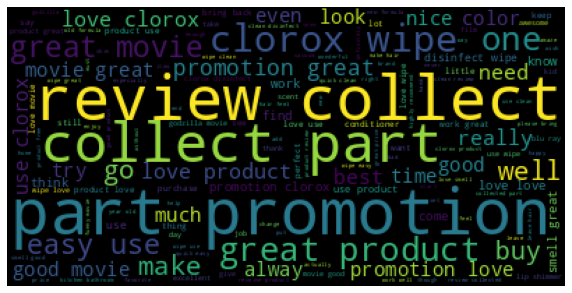

In [64]:
plt.figure(figsize= (10, 6))
word_cloud = WordCloud(collocations= True).generate(" ".join([review for review in df[df["user_sentiment"] == "Positive"]["reviews"]]))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

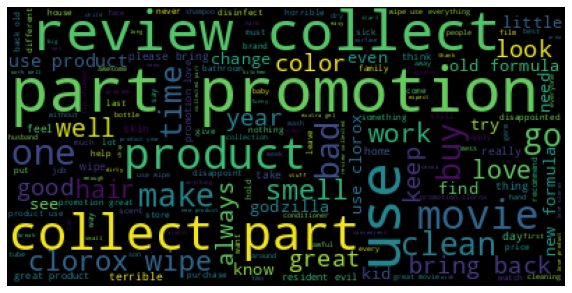

In [65]:
plt.figure(figsize= (10, 6))
word_cloud = WordCloud(collocations= True).generate(" ".join([review for review in df[df["user_sentiment"] == "Negative"]["reviews"]]))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

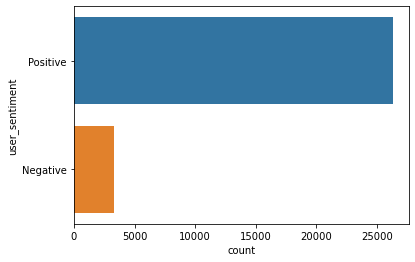

In [66]:
sns.countplot(y = df["user_sentiment"])
plt.show()

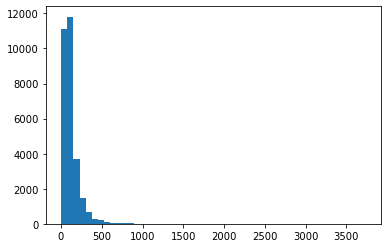

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,4))
doc_lens = [len(d) for d in df['reviews']]
plt.hist(doc_lens, bins = 50)
plt.show()

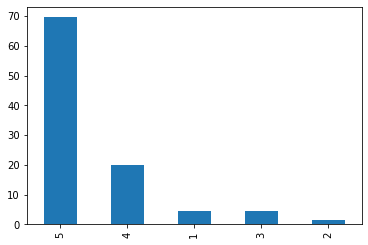

In [68]:
percent_val2 = 100 * df['reviews_rating'].value_counts()/len(df)
percent_val2.plot.bar()
plt.show()

## Label Encoding 

In [69]:
Encoding= preprocessing.LabelEncoder() # Encoding the dependent variable
df['user_sentiment'] = Encoding.fit_transform(df['user_sentiment'])
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd),5,joshua,1,awesome love album good hip hop side current p...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor review collect part promotion,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor,5


**Observation from EDA**
- On visualizing the output class 'user_sentiment' shows that the data is highly imbalanced
- On visualizing the input column 'review rating' it is acknowledged from the record that almost 70% of the user has rated 5 for products
- On visualizing the length of the texts present in the input column 'revies', it is interpretated that higher number of data lengths in the text column 'reviews' are more than 10,000.

### Dataframe with only product names and reviews are created 
- To use it in future for the purpose of recommending the final top 5 products
- Created dataframe is saved as pickel file

In [70]:
product_name_reviews_df = df[["name", "reviews"]]
product_name_reviews_df

,name,reviews
0,Pink Friday: Roman Reloaded Re-Up (W/Dvd),awesome love album good hip hop side current p...
1,Lundberg Organic Cinnamon Toast Rice Cakes,good good flavor review collect part promotion
2,Lundberg Organic Cinnamon Toast Rice Cakes,good good flavor
3,K-Y Love Sensuality Pleasure Gel,disappoint read review look buy one couple lub...
4,K-Y Love Sensuality Pleasure Gel,irritation husband buy gel gel caused irritati...
...,...,...
29995,L'Or233Al Paris Elvive Extraordinary Clay Reba...,softness get conditioner influenster try im lo...
29996,L'Or233Al Paris Elvive Extraordinary Clay Reba...,love love receive review purpose influenster l...
29997,L'Or233Al Paris Elvive Extraordinary Clay Reba...,hair smooth use first love smell product wash ...
29998,L'Or233Al Paris Elvive Extraordinary Clay Reba...,perfect oily hair receive influenster never go...


In [71]:
product_name_reviews_df.to_pickle("cleaned_data.pkl")

## Feature Extraction

In [72]:
df.head(3)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd),5,joshua,1,awesome love album good hip hop side current p...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor review collect part promotion,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor,5


**Declaring x and y variable**

In [73]:
x = df[['reviews']]
y = df['user_sentiment']
x.shape, y.shape

((29658, 1), (29658,))

**TfIdf vectorization**

In [74]:
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, stop_words=stopwords.words('english'),ngram_range=(1,1))

df_x = tfidf_counts.fit_transform(df['reviews'])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [75]:
pkl_filename = "Tfidf_vectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf_counts, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_tfidf_vectorizer = pickle.load(file)

In [76]:
df_x.shape

(29658, 17571)

## Balancing the data

In [77]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(df_x, y.ravel())

print('After OverSampling, the shape of X: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

Before OverSampling, counts of label '1': 26330
Before OverSampling, counts of label '0': 3328 

After OverSampling, the shape of X: (52660, 17571)
After OverSampling, the shape of y: (52660,) 

After OverSampling, counts of label '1': 26330
After OverSampling, counts of label '0': 26330


## Data splitting

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 0)

In [79]:
x_train.shape, x_test.shape

((42128, 17571), (10532, 17571))

In [80]:
y_train.shape, y_test.shape

((42128,), (10532,))

## Model Building

### 1. Logistic Regression

### 2. Random Forest Classifier

### 3. XGBoost Classifier

### 4. Naive Bayes

### Logistic regression

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5256
           1       0.93      0.86      0.89      5276

    accuracy                           0.90     10532
   macro avg       0.90      0.90      0.90     10532
weighted avg       0.90      0.90      0.90     10532

Accuracy :  0.8976452715533612
F1 score:  0.8934993084370678
Recall:  0.8570887035633056
Precision:  0.933140734626496


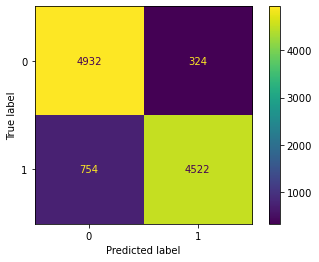

In [81]:
lr = LogisticRegression()

lr.fit(x_train, y_train.ravel())# training logistic regression technique with training dataset
predictions = lr.predict(x_test)# testing the trained algorithm

print(classification_report(y_test, predictions)) # classification report
print("Accuracy : ",accuracy_score(y_test, predictions))
print("F1 score: ",f1_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))

confusion = confusion_matrix(y_test, predictions) # confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0, 1])
cm_display.plot()
plt.show()

### Random forest classifier

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5256
           1       0.98      0.95      0.97      5276

    accuracy                           0.97     10532
   macro avg       0.97      0.97      0.97     10532
weighted avg       0.97      0.97      0.97     10532

Accuracy :  0.9661033042157235
F1 score:  0.9657225156024964
Recall:  0.9531842304776346
Precision:  0.9785950574041642


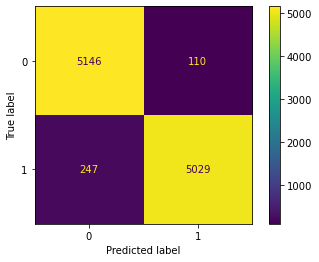

In [82]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train.ravel())# training logistic regression technique with training dataset
predictions = rf.predict(x_test)# testing the trained algorithm

print(classification_report(y_test, predictions)) # classification report
print("Accuracy : ",accuracy_score(y_test, predictions))
print("F1 score: ",f1_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))

confusion = confusion_matrix(y_test, predictions) # confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0, 1])
cm_display.plot()
plt.show()

### XGBoost classifier

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5256
           1       0.92      0.92      0.92      5276

    accuracy                           0.92     10532
   macro avg       0.92      0.92      0.92     10532
weighted avg       0.92      0.92      0.92     10532

Accuracy :  0.9169198632738321
F1 score:  0.9169119741714937
Recall:  0.9150871872630781
Precision:  0.918744053282588


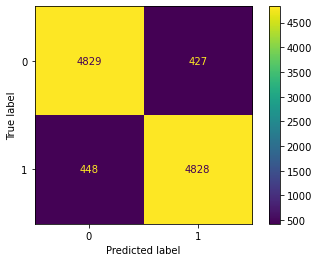

In [83]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train.ravel())# training logistic regression technique with training dataset
predictions = xgb.predict(x_test)# testing the trained algorithm

print(classification_report(y_test, predictions)) # classification report
print("Accuracy : ",accuracy_score(y_test, predictions))
print("F1 score: ",f1_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))

confusion = confusion_matrix(y_test, predictions) # confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0, 1])
cm_display.plot()
plt.show()

### Naive bayes 

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5256
           1       0.85      0.83      0.84      5276

    accuracy                           0.84     10532
   macro avg       0.84      0.84      0.84     10532
weighted avg       0.84      0.84      0.84     10532

Accuracy :  0.8434295480440562
F1 score:  0.8420649363087827
Recall:  0.8332069749810462
Precision:  0.8511132623426912


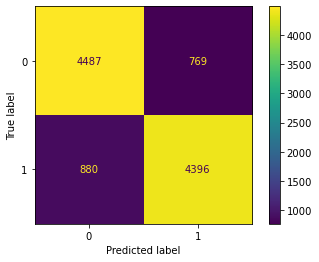

In [84]:
nb = MultinomialNB()

nb.fit(x_train, y_train.ravel())# training logistic regression technique with training dataset
predictions = nb.predict(x_test)# testing the trained algorithm

print(classification_report(y_test, predictions)) # classification report
print("Accuracy : ",accuracy_score(y_test, predictions))
print("F1 score: ",f1_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))

confusion = confusion_matrix(y_test, predictions) # confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0, 1])
cm_display.plot()
plt.show()

**RESULT**
- On comparing Logistic Regression, Random forest, Naive bayes and XGBoost model **Random forest classifier** has performed better with better scores
- saving the best performing model as a pickel file 
- This model can be further utilized for building recommendation system

In [85]:
pkl_filename = "Random_forest_final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)

with open(pkl_filename, 'rb') as file:
    pickled_model = pickle.load(file)

---

## Building a recommendation system

### 1. User Based Recommendation System

### 2. Item Based Recommendation System

In [86]:
df_reco = df[df['reviews'].isnull()== False] # dropping rows with null values in the column 'reviews'
df_reco.reset_index(drop=True)
print(len(df_reco))
df_reco.head(10)

29658


,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd),5,joshua,1,awesome love album good hip hop side current p...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor review collect part promotion,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,0,disappoint read review look buy one couple lub...,6
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,0,irritation husband buy gel gel caused irritati...,6
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,samantha,0,worth boyfriend bought spice thing bedroom hig...,6
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,raeanne,0,disappoint buy earlier today excite check base...,6
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,kimmie,0,happy buy product husband try impress tingle w...,6
8,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,cassie,0,disappointing husband buy extra fun werevboth ...,6
9,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,moore222,1,buy get surprise husband nothing special lube ...,6


**Data splitting**

In [87]:
train, test = train_test_split(df_reco, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

(20760, 7)
(8898, 7)


### User based Recommendation system

**Pivot table is created using the ratings' dataset into matrix format in which columns are products and the rows are user IDs.**

In [88]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)
print(df_pivot.shape)
df_pivot.head(10)

(18210, 261)


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11111111aaaaaaaaaaaaaaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Following datasets are created which will be used for prediction

    - Dummy train dataset will be used later for prediction of the products which have not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset.

    - Dummy test dataset will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [89]:
dummy_train = train.copy() # Copy the train dataset into dummy_train

# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [90]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Cosine Similarity
  #### Cosine Similarity is a measurement that quantifies the similarity between two vectors

In [91]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [92]:
user_correlation.shape

(18210, 18210)

#### User prediction
- Doing the prediction for the users who are positively related with other users, and not with the users who are negatively related as we are interested in the users who are more similar to the current users. 
- So, ignoring the correlation for values less than 0.

In [93]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [94]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.15165741,
        0.        ],
       [0.        , 0.        , 6.54320452, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.4975186 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.15165741,
        0.        ],
       [0.        , 0.        , 0.4975186 , ..., 0.        , 0.        ,
        0.        ]])

In [95]:
user_predicted_ratings.shape

(18210, 261)

**Observation:**
- Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [96]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
00sab00,0.0,0.0,0.000000,7.071068,0.0,0.0,0.0,0.610847,0.0,2.236068,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,2.151657,0.0
01impala,0.0,0.0,6.543205,12.622408,0.0,0.0,0.0,0.000000,0.0,1.766904,...,0.0,0.0,1.579082,0.0,0.0,0.0,3.81515,0.0,0.000000,0.0
02dakota,0.0,0.0,6.543205,12.622408,0.0,0.0,0.0,0.000000,0.0,1.766904,...,0.0,0.0,1.579082,0.0,0.0,0.0,3.81515,0.0,0.000000,0.0
02deuce,0.0,0.0,6.543205,12.622408,0.0,0.0,0.0,0.000000,0.0,1.766904,...,0.0,0.0,1.579082,0.0,0.0,0.0,3.81515,0.0,0.000000,0.0


In [98]:
# Take the user name as input. 
user_input = str(input("Enter your user name")) # suggestion: 00dog3
print(user_input)

Enter your user name00dog3
00dog3


In [100]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpf3VOfilAPnD_xjpun    5.869817
AVpe41TqilAPnD_xQH3d    4.774398
AVpe59io1cnluZ0-ZgDU    3.773248
AVpfM_ytilAPnD_xXIJb    3.454258
AVpfOIrkilAPnD_xXgDG    2.461830
Name: 00dog3, dtype: float64

In [101]:
mapping= df_reco[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [102]:
# Merging product id with mapping file to get the name of the recommended product
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,00dog3,name
0,AVpf3VOfilAPnD_xjpun,5.869817,Clorox Disinfecting Wipes Value Pack Scented 1...
1,AVpe41TqilAPnD_xQH3d,4.774398,Mike Dave Need Wedding Dates (Dvd + Digital)
2,AVpe59io1cnluZ0-ZgDU,3.773248,My Big Fat Greek Wedding 2 (Blu-Ray + Dvd + Di...
3,AVpfM_ytilAPnD_xXIJb,3.454258,Tostitos Bite Size Tortilla Chips
4,AVpfOIrkilAPnD_xXgDG,2.461830,Alex Cross (Dvdvideo)


**Evaluating  User-user recommendation system**
- Evaluation will be same as you have seen above for the prediction. 
- The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [103]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]

In [104]:
common.head(10)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
24672,AVpfPaoqLJeJML435Xk9,Godzilla 3D Includes Digital Copy Ultraviolet ...,5,floyd,1,great best godzilla movie year much good ameri...,6
5547,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (Blu-Ray),5,barb,1,love series love series get two season,6
10689,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,bzmama,1,excellent great quick clean use everything esp...,10
21180,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,bru1,0,awful smell use product year new product awful...,7
11914,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,amyx3duh,1,clorox wipe clorox brand trust clean month old...,8
29202,AVpfW8y_LJeJML437ySW,L'Or233Al Paris Elvive Extraordinary Clay Reba...,4,lexiiitaylor,1,strong smell receive product free testing purp...,6
19135,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,mandm,1,nothing wrong product love fresh smell also di...,10
5464,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (Blu-Ray),5,chels,1,love series watch first season tv every week n...,7
27889,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (Includes Digita...,5,babs,0,great terrific,8
13313,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ffgirl,1,love product clorox wipe perfect easy quick cl...,10


In [105]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18200,18201,18202,18203,18204,18205,18206,18207,18208,18209
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
user_correlation_df['reviews_username'] = df_pivot.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18200,18201,18202,18203,18204,18205,18206,18207,18208,18209
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
01impala,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
common.head(1)

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
24672,AVpfPaoqLJeJML435Xk9,Godzilla 3D Includes Digital Copy Ultraviolet ...,5,floyd,1,great best godzilla movie year much good ameri...,6


In [109]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [110]:
user_correlation_df_1.shape

(1604, 18210)

In [111]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [112]:
user_correlation_df_3 = user_correlation_df_2.T

In [113]:
print(user_correlation_df_3.shape)
user_correlation_df_3.head()

(1604, 1604)


,00sab00,1234,1234567,1234asdf,143st,1943,23jen,37f5p,4 rooms 1 dog lotsa fur,7.87e+11,...,xmom,yayawomack,ygtz,yoadrian,yohnie1,zach,zebras,zippy,zmom,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.8,0.0,0.0
1234567,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.707107,0.0,1.0,0.0,0.0,1.0
1234asdf,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [114]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 9.54340665, 1.76776695, ..., 0.        , 0.        ,
        0.70710678],
       [0.        , 3.07728727, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.4745379 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 6.97477842, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.4745379 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [115]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(0)
print(dummy_test.shape)

(1604, 131)


In [116]:
print(common_user_based_matrix.shape)
common_user_based_matrix.head()

(1604, 131)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
print(dummy_test.shape)
dummy_test.head(10)

(1604, 131)


id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(10)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **Calculating the RMSE for only the products rated by user.**

**For RMSE, normalising the rating to (1,5) range**

In [119]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [120]:
common_ = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')


total_non_nan = np.count_nonzero(~np.isnan(y)) # Finding total non-NaN value

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.1609217126775415


**Observation:**
- The RMSE score acquired for User based recommendation system is = 2.1

### Item based recommendation system


In [121]:
df_pivot = train.pivot_table(
   index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,09mommy11,1085,11111111aaaaaaaaaaaaaaaaa,1143mom,...,zooey_57,zotox,zozo0o,zpalma,zubb,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [123]:
item_correlation.shape

(261, 261)

**Observation:**
- Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [124]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [125]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.13019578,
        0.        ],
       [0.        , 0.        , 0.04937202, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00195505, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21699296,
        0.        ],
       [0.        , 0.        , 0.0039101 , ..., 0.        , 0.        ,
        0.        ]])

In [126]:
print(item_predicted_ratings.shape)
print(dummy_train.shape)

(18210, 261)
(18210, 261)


**Observation**
- Filtering the rating only for products not rated by the user for recommendation

In [127]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
00sab00,0.0,0.0,0.000000,0.023043,0.0,0.0,0.0,0.004411,0.0,0.038792,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.130196,0.0
01impala,0.0,0.0,0.049372,0.028236,0.0,0.0,0.0,0.000000,0.0,0.011708,...,0.0,0.0,0.045568,0.0,0.0,0.0,0.008493,0.0,0.000000,0.0
02dakota,0.0,0.0,0.082287,0.047060,0.0,0.0,0.0,0.000000,0.0,0.019513,...,0.0,0.0,0.075946,0.0,0.0,0.0,0.014155,0.0,0.000000,0.0
02deuce,0.0,0.0,0.065829,0.037648,0.0,0.0,0.0,0.000000,0.0,0.015611,...,0.0,0.0,0.060757,0.0,0.0,0.0,0.011324,0.0,0.000000,0.0


In [128]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name00dog3
00dog3


In [129]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfBU2S1cnluZ0-cJsO    0.251973
AVpfM_ytilAPnD_xXIJb    0.132520
AVpfAgSp1cnluZ0-b2-K    0.126097
AVpe5s3RLJeJML43x4eA    0.125149
AVpfOmKwLJeJML435GM7    0.108086
Name: 00dog3, dtype: float64

In [130]:
mapping= df_reco[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [131]:
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,00dog3,name
0,AVpfBU2S1cnluZ0-cJsO,0.251973,Power Crunch Protein Energy Bar Peanut Butter ...
1,AVpfM_ytilAPnD_xXIJb,0.132520,Tostitos Bite Size Tortilla Chips
2,AVpfAgSp1cnluZ0-b2-K,0.126097,"Bounce Dryer Sheets, Fresh Linen, 160 Sheets"
3,AVpe5s3RLJeJML43x4eA,0.125149,Pantene Pro-V Expert Collection Age Defy Condi...
4,AVpfOmKwLJeJML435GM7,0.108086,Clear Scalp & Hair Therapy Total Care Nourishi...


Evaluation item 

In [132]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username', 'user_sentiment',
       'reviews', 'reviews_age'],
      dtype='object')

In [133]:
common = test[test.id.isin(train.id	)]
print(common.shape)
common.head()

(8886, 7)


,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
17561,AVpfbkyr1cnluZ0-kozI,Kraus Fvs-1007 Single Hole Vessel Bathroom Fau...,5,don11,1,kraus vessel faucet faucet look great work gre...,11
16770,AVpf9_3MLJeJML43GvdB,"Iman Second To None Stick Foundation, Clay 1",5,qpworu,1,great coverage foundation offer great coverage...,8
14737,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,kims1017,1,great scent full clean power product smell goo...,10
6252,AVpf2tw1ilAPnD_xjflC,Red (Special Edition) (Dvdvideo),5,ecneretwodnaj,1,great fun movie hold intrest,11
13861,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,shawnm1981,1,love stuff love use clorox wonderful clean job...,7


In [134]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [135]:
common_item_based_matrix.shape

(190, 8296)

In [136]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.053658,0.0,0.0,0.0,0.006429,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [137]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.053658,0.0,0.0,0.0,0.006429,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [138]:
list_name = common.id.tolist()

item_correlation_df.columns = df_pivot.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.022614,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.001951,0.0,0.0,0.0,0.0,0.0,0.006429,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041154,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [139]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
print(common_item_predicted_ratings.shape)
common_item_predicted_ratings

(190, 8296)


array([[0.00358066, 0.00488763, 0.        , ..., 0.        , 0.00488763,
        0.00488763],
       [0.01251221, 0.01159703, 0.01270629, ..., 0.08077244, 0.01159703,
        0.01159703],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00413908, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02618307, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [140]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [141]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [142]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5875544725556527


**Observation:**
- The RMSE score acquired by Item based Recommendation system is 3.5
- Since the RMSE for User-based recommendation system is lesser as compared to Item-based recommendation system, the User-based recommendation system is selected for this project

In [143]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name00dog3
00dog3


In [144]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
mapping= df_reco[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
recommendations = pd.merge(recommendations,mapping, left_on='id', right_on='id', how = 'left')
recommendations

,id,00dog3,name
0,AVpf3VOfilAPnD_xjpun,5.869817,Clorox Disinfecting Wipes Value Pack Scented 1...
1,AVpe41TqilAPnD_xQH3d,4.774398,Mike Dave Need Wedding Dates (Dvd + Digital)
2,AVpe59io1cnluZ0-ZgDU,3.773248,My Big Fat Greek Wedding 2 (Blu-Ray + Dvd + Di...
3,AVpfM_ytilAPnD_xXIJb,3.454258,Tostitos Bite Size Tortilla Chips
4,AVpfOIrkilAPnD_xXgDG,2.461830,Alex Cross (Dvdvideo)
5,AVpfPaoqLJeJML435Xk9,2.096570,Godzilla 3D Includes Digital Copy Ultraviolet ...
6,AVpf63aJLJeJML43F__Q,2.076137,"Burt'S Bees Lip Shimmer, Raisin"
7,AVpfBU2S1cnluZ0-cJsO,2.076137,Power Crunch Protein Energy Bar Peanut Butter ...
8,AVpfRTh1ilAPnD_xYic2,1.697111,Planes: Fire Rescue (2 Discs) (Includes Digita...
9,AVpe5s3RLJeJML43x4eA,1.697111,Pantene Pro-V Expert Collection Age Defy Condi...


In [145]:
import pickle

user_final_rating.to_pickle("user_final_rating.pkl")
pickled_user_final_rating = pd.read_pickle("user_final_rating.pkl")
pickled_user_final_rating

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
00sab00,0.0,0.0,0.000000,7.071068,0.0,0.0,0.0,0.610847,0.0000,2.236068,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,2.151657,0.0
01impala,0.0,0.0,6.543205,12.622408,0.0,0.0,0.0,0.000000,0.0000,1.766904,...,0.000000,0.0,1.579082,0.0,0.0,0.0,3.81515,0.0,0.000000,0.0
02dakota,0.0,0.0,6.543205,12.622408,0.0,0.0,0.0,0.000000,0.0000,1.766904,...,0.000000,0.0,1.579082,0.0,0.0,0.0,3.81515,0.0,0.000000,0.0
02deuce,0.0,0.0,6.543205,12.622408,0.0,0.0,0.0,0.000000,0.0000,1.766904,...,0.000000,0.0,1.579082,0.0,0.0,0.0,3.81515,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.0,0.497519,5.752917,0.0,0.0,0.0,3.123475,3.5007,2.236068,...,3.535534,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
zxcsdfd,0.0,0.0,0.497519,5.752917,0.0,0.0,0.0,3.123475,3.5007,2.236068,...,3.535534,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0
zxjki,0.0,0.0,0.497519,5.752917,0.0,0.0,0.0,3.123475,3.5007,2.236068,...,3.535534,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0


In [146]:
# Save to file in the current working directory

mapping.to_pickle("prod_id_name_mapping.pkl")
pickled_mapping = pd.read_pickle("prod_id_name_mapping.pkl")
pickled_mapping

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
...,...,...
28769,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
28772,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris Advanced Hairstyle Txt It Hyper-...
28795,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
28799,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer'S Lemon Verbena Surface Scrub


In [147]:
# Save to file in the current working directory

df.to_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data = pd.read_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data

,id,name,reviews_rating,reviews_username,user_sentiment,reviews,reviews_age
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (W/Dvd),5,joshua,1,awesome love album good hip hop side current p...,10
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor review collect part promotion,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,good good flavor,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca,0,disappoint read review look buy one couple lub...,6
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557,0,irritation husband buy gel gel caused irritati...,6
...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'Or233Al Paris Elvive Extraordinary Clay Reba...,5,laurasnchz,1,softness get conditioner influenster try im lo...,5
29996,AVpfW8y_LJeJML437ySW,L'Or233Al Paris Elvive Extraordinary Clay Reba...,5,scarlepadilla,1,love love receive review purpose influenster l...,5
29997,AVpfW8y_LJeJML437ySW,L'Or233Al Paris Elvive Extraordinary Clay Reba...,5,liviasuexo,1,hair smooth use first love smell product wash ...,5
29998,AVpfW8y_LJeJML437ySW,L'Or233Al Paris Elvive Extraordinary Clay Reba...,5,ktreed95,1,perfect oily hair receive influenster never go...,5


## 3. Improving the recommendations using the sentiment analysis model:

#### **Fine-Tuning the recommendation system and recommending top 5 products to the user based on highest percentage of positive sentiments using Sentiment Analysis model developed earlier**

In [148]:
# Predicting sentiment for the recommended products using the Logistic Regression model developed earlier

improved_recommendations= pd.merge(recommendations,pickled_reviews_data[['id','reviews']], left_on='id', right_on='id', how = 'left')
test_data_for_user = pickled_tfidf_vectorizer.transform(improved_recommendations['reviews'])
sentiment_prediction_for_user= pickled_model.predict(test_data_for_user)
sentiment_prediction_for_user = pd.DataFrame(sentiment_prediction_for_user, columns=['Predicted_Sentiment'])
improved_recommendations= pd.concat([improved_recommendations, sentiment_prediction_for_user], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [149]:
# For each of the 20 recommended products, calculating the percentage of positive sentiments 
#   for all the reviews of each product

a=improved_recommendations.groupby('id')
b=pd.DataFrame(a['Predicted_Sentiment'].count()).reset_index()
b.columns = ['id', 'Total_reviews']
c=pd.DataFrame(a['Predicted_Sentiment'].sum()).reset_index()
c.columns = ['id', 'Total_predicted_positive_reviews']
improved_recommendations_final=pd.merge( b, c, left_on='id', right_on='id', how='left')
improved_recommendations_final['Positive_sentiment_rate'] = improved_recommendations_final['Total_predicted_positive_reviews'].div(improved_recommendations_final['Total_reviews']).replace(np.inf, 0)
improved_recommendations_final= improved_recommendations_final.sort_values(by=['Positive_sentiment_rate'], ascending=False )
improved_recommendations_final=pd.merge(improved_recommendations_final, pickled_mapping, left_on='id', right_on='id', how='left')

# Filtering out the top 5 products with the highest percentage of positive review
improved_recommendations_final.head(5)

,id,Total_reviews,Total_predicted_positive_reviews,Positive_sentiment_rate,name
0,AVpfOrD0ilAPnD_xXrRj,1,1,1.000000,Progresso Traditional Chicken Rice With Vegeta...
1,AVpfNglu1cnluZ0-gQ7x,11,11,1.000000,Mia Shower Curtain Green/Brown - Lush Decor174
2,AVpe59io1cnluZ0-ZgDU,668,641,0.959581,My Big Fat Greek Wedding 2 (Blu-Ray + Dvd + Di...
3,AVpe5s3RLJeJML43x4eA,136,129,0.948529,Pantene Pro-V Expert Collection Age Defy Condi...
4,AVpfRTh1ilAPnD_xYic2,1143,1064,0.930884,Planes: Fire Rescue (2 Discs) (Includes Digita...
